# Encoding Categorical Variables

Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical variables are encoded.
Categorical variables can be divided into two categories: Nominal (No particular order) and Ordinal (some ordered).

 <img src="https://miro.medium.com/max/700/1*wYbTRM0dgnRzutwZq63xCg.png" />



- `OrdinalEncoder()`: Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1]. Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).



In [1]:
import pandas as pd
import numpy as np 

df = pd.DataFrame({
    'geo': ["paris", "paris", "tokyo", "paris", 'america', 'america', 'america', "tokyo", 'tokyo', 'america'],
    'temp': ['hot', 'cold', 'warm', 'cold', 'hot', 'hot', 'hot', 'warm', 'warm', 'very-hot'],
    'mood': ['good', 'bad', 'great', 'bad', 'good', 'good', 'good', 'great', 'bad', 'great'],
    'grade': ['A', 'A', 'C', 'C', 'C', 'F', 'B', 'D', 'A', 'D'],
    'age': [25,20,30,35,25,30,40,21,39,28],
    "genre": [["action", "drama","fantasy"], ["fantasy","action"], ["drama"], ["action", "drama","fantasy"], 
              ["action"], ["fantasy","action"], ["fantasy","action", "sci-fi"], ["sci-fi", "drama"], ["drama","fantasy"], ['fantasy']],
    "target": [1,0,1,1,0,1,1,0,0,1]
      
})

df

,geo,temp,mood,grade,age,genre,target
0,paris,hot,good,A,25,"[action, drama, fantasy]",1
1,paris,cold,bad,A,20,"[fantasy, action]",0
2,tokyo,warm,great,C,30,[drama],1
3,paris,cold,bad,C,35,"[action, drama, fantasy]",1
4,america,hot,good,C,25,[action],0
5,america,hot,good,F,30,"[fantasy, action]",1
6,america,hot,good,B,40,"[fantasy, action, sci-fi]",1
7,tokyo,warm,great,D,21,"[sci-fi, drama]",0
8,tokyo,warm,bad,A,39,"[drama, fantasy]",0
9,america,very-hot,great,D,28,[fantasy],1


## One Hot Encoding
In this method, we map each category to a vector that contains $1$ and $0$ denoting the presence or absence of the feature. The number of vectors depends on the number of categories for features. This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature. `Pandas` has `get_dummies` function, which is quite easy to use and `sklearn` has `OneHotEncoder()`.

In [2]:
df_dummy = pd.get_dummies(df[['geo', 'temp', 'mood', 'grade']])

print('Original:')
df

Original:


,geo,temp,mood,grade,age,genre,target
0,paris,hot,good,A,25,"[action, drama, fantasy]",1
1,paris,cold,bad,A,20,"[fantasy, action]",0
2,tokyo,warm,great,C,30,[drama],1
3,paris,cold,bad,C,35,"[action, drama, fantasy]",1
4,america,hot,good,C,25,[action],0
5,america,hot,good,F,30,"[fantasy, action]",1
6,america,hot,good,B,40,"[fantasy, action, sci-fi]",1
7,tokyo,warm,great,D,21,"[sci-fi, drama]",0
8,tokyo,warm,bad,A,39,"[drama, fantasy]",0
9,america,very-hot,great,D,28,[fantasy],1


In [3]:
print('\nOnehot:')
df_dummy


Onehot:


,geo_america,geo_paris,geo_tokyo,temp_cold,temp_hot,temp_very-hot,temp_warm,mood_bad,mood_good,mood_great,grade_A,grade_B,grade_C,grade_D,grade_F
0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
6,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
7,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
8,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0
9,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0


- Usually, for Regression, we use $N-1$ (drop first or last column of One Hot Coded new feature ), but for classification, the recommendation is to use all $N$ columns without as most of the tree-based algorithm builds a tree based on all available variables. One hot encoding with $N-1$ binary variables should be used in linear Regression, to ensure the correct number of degrees of freedom $(N-1)$.

- In tree-based methods, we will never consider that additional label if we drop. Thus, if we use the categorical variables in a tree-based learning algorithm, it is good practice to encode it into N binary variables and don’t drop.

## Label Encoding

In this encoding, each category is assigned a value from $1$ through $N$ (here $N$ is the number of categories for the feature. One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order, or there is some relationship like with the `temp` or `mood` columns.

In [4]:
from sklearn import preprocessing

# Create LabelEncoder object: le
le = preprocessing.LabelEncoder()
le_cols = ['geo', 'temp', 'mood', 'grade']

df_le = df.copy()
for col in le_cols:
    df_le[col + '_label'] = le.fit_transform(df_le[col])

df_le

,geo,temp,mood,grade,age,genre,target,geo_label,temp_label,mood_label,grade_label
0,paris,hot,good,A,25,"[action, drama, fantasy]",1,1,1,1,0
1,paris,cold,bad,A,20,"[fantasy, action]",0,1,0,0,0
2,tokyo,warm,great,C,30,[drama],1,2,3,2,2
3,paris,cold,bad,C,35,"[action, drama, fantasy]",1,1,0,0,2
4,america,hot,good,C,25,[action],0,0,1,1,2
5,america,hot,good,F,30,"[fantasy, action]",1,0,1,1,4
6,america,hot,good,B,40,"[fantasy, action, sci-fi]",1,0,1,1,1
7,tokyo,warm,great,D,21,"[sci-fi, drama]",0,2,3,2,3
8,tokyo,warm,bad,A,39,"[drama, fantasy]",0,2,3,0,0
9,america,very-hot,great,D,28,[fantasy],1,0,2,2,3


## Ordinal Encoding

We do Ordinal encoding to ensure the encoding of variables retains the ordinal nature of the variable. This is reasonable only for ordinal variables. This encoding looks almost similar to Label Encoding but slightly different as Label coding would not consider whether variable is ordinal or not and it will assign a sequence of integers.

- as per the order of data (Pandas assigned Hot (0), Cold (1), “Very Hot” (2) and Warm (3)) or

- as per alphabetical sorted order (scikit-learn assigned Cold(0), Hot(1), “Very Hot” (2) and Warm (3)).

If we consider in the temperature scale as the order, then the ordinal value should from cold to “Very Hot. “ Ordinal encoding will assign values as ( Cold(1) <Warm(2)<Hot(3)<Very Hot(4)). Usually, we Ordinal Encoding is done starting from 1.

In [5]:
temp_dict = {'cold': 1,
             'warm': 2,
             'hot': 3,
             'very-hot': 4}

df_le['temp_ordinal'] = df_le.temp.map(temp_dict)

df_le[['temp', 'temp_label', 'temp_ordinal']]

,temp,temp_label,temp_ordinal
0,hot,1,3
1,cold,0,1
2,warm,3,2
3,cold,0,1
4,hot,1,3
5,hot,1,3
6,hot,1,3
7,warm,3,2
8,warm,3,2
9,very-hot,2,4


Though it’s very straight forward it requires coding to tell ordinal values and what is the actual mapping from text to an integer as per the order.

## MultiLabelBinarizer

For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1]. Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).



In [6]:
mlb = preprocessing.MultiLabelBinarizer()
df_mlb = pd.DataFrame(mlb.fit_transform(df['genre']),columns=mlb.classes_)
pd.concat([df, df_mlb], axis=1)

,geo,temp,mood,grade,age,genre,target,action,drama,fantasy,sci-fi
0,paris,hot,good,A,25,"[action, drama, fantasy]",1,1,1,1,0
1,paris,cold,bad,A,20,"[fantasy, action]",0,1,0,1,0
2,tokyo,warm,great,C,30,[drama],1,0,1,0,0
3,paris,cold,bad,C,35,"[action, drama, fantasy]",1,1,1,1,0
4,america,hot,good,C,25,[action],0,1,0,0,0
5,america,hot,good,F,30,"[fantasy, action]",1,1,0,1,0
6,america,hot,good,B,40,"[fantasy, action, sci-fi]",1,1,0,1,1
7,tokyo,warm,great,D,21,"[sci-fi, drama]",0,0,1,0,1
8,tokyo,warm,bad,A,39,"[drama, fantasy]",0,0,1,1,0
9,america,very-hot,great,D,28,[fantasy],1,0,0,1,0


## Frequency Encoding

It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data.
 

**Three-step for this:**
1. Select a categorical variable you would like to transform
2. Group by the categorical variable and obtain counts of each category
3. Join it back with the training dataset

In [7]:
fe = df.groupby('temp').size() / len(df)
df_le['temp_freq'] = df.temp.map(fe)

df_le[['temp', 'temp_label', 'temp_ordinal', 'temp_freq']]

,temp,temp_label,temp_ordinal,temp_freq
0,hot,1,3,0.4
1,cold,0,1,0.2
2,warm,3,2,0.3
3,cold,0,1,0.2
4,hot,1,3,0.4
5,hot,1,3,0.4
6,hot,1,3,0.4
7,warm,3,2,0.3
8,warm,3,2,0.3
9,very-hot,2,4,0.1


## Mean or Target Encoding

Mean encoding is similar to label encoding, except here labels are correlated directly with the target. 

- For example, in mean target encoding each category in the feature label is decided with the mean value of the target variable on the training data. This encoding method brings out the relation between similar categories, but the connections are bounded within the categories and the target itself. The advantages of the mean target encoding are that it does not affect the volume of the data and helps in faster learning. Usually, Mean encoding is notorious for over-fitting; thus, a regularization with cross-validation or some other approach is a must on most occasions. 

**Mean encoding steps:**

1. Select a categorical variable to transform
2. Group by the selected categorical variable and obtain an aggregated *sum* over the `Target` variable. (total number of 1’s in the target for each category in `temp`)
3. Group by the categorical variable and obtain an aggregated *count* over the“Target” variable
4. Divide step $2$ with step $3$ results and join it back with the training data.

 <img src="https://miro.medium.com/max/700/1*iiM9g-qCa-Vff_HAFk-ppQ.png" />


In [8]:
mean_enc = df.groupby('temp')['target'].mean()
print(mean_enc)

df_le['temp_mean_enc'] = df_le.temp.map(mean_enc)

df_le[['temp', 'temp_label', 'temp_ordinal', 'temp_mean_enc']]

temp
cold        0.500000
hot         0.750000
very-hot    1.000000
warm        0.333333
Name: target, dtype: float64


,temp,temp_label,temp_ordinal,temp_mean_enc
0,hot,1,3,0.750000
1,cold,0,1,0.500000
2,warm,3,2,0.333333
3,cold,0,1,0.500000
4,hot,1,3,0.750000
5,hot,1,3,0.750000
6,hot,1,3,0.750000
7,warm,3,2,0.333333
8,warm,3,2,0.333333
9,very-hot,2,4,1.000000


Mean encoding can embody the target in the label, whereas label encoding does not correlate with the target. In the case of a large number of features, mean encoding could prove to be a much simpler alternative. Mean encoding tends to group the classes, whereas the grouping is random in case of label encoding.

## Smooth Target encoding 

In [9]:
mean = df.target.mean()
agg = df.groupby('temp')['target'].agg(['count', 'mean'])

counts = agg['count']
means = agg['mean']
weight = 100

smooth = (counts * means + weight * mean) / (counts + weight)
print('smooth:')
print(smooth)

df_le['temp_smean_enc'] = df_le.temp.map(smooth)

df_le[['temp', 'temp_label', 'temp_ordinal', 'temp_mean_enc', 'temp_smean_enc']]

smooth:
temp
cold        0.598039
hot         0.605769
very-hot    0.603960
warm        0.592233
dtype: float64


,temp,temp_label,temp_ordinal,temp_mean_enc,temp_smean_enc
0,hot,1,3,0.750000,0.605769
1,cold,0,1,0.500000,0.598039
2,warm,3,2,0.333333,0.592233
3,cold,0,1,0.500000,0.598039
4,hot,1,3,0.750000,0.605769
5,hot,1,3,0.750000,0.605769
6,hot,1,3,0.750000,0.605769
7,warm,3,2,0.333333,0.592233
8,warm,3,2,0.333333,0.592233
9,very-hot,2,4,1.000000,0.603960


# Weight of Evidence Encoding

The **weight of evidence (WoE)** tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.

- The terms goods/bads can be misleading. It's good to understand the concept of WOE in terms of events and non-events. It is calculated by taking the natural logarithm (log to base e) of division of % of non-events and % of events. It is computed as below:

$$\begin{equation*} WoE =  \begin{bmatrix} ln \left(\frac{\text{Distr Events}}{\text{Distr Non-Events}} \right) \end{bmatrix} \ast 100\end{equation*}$$

**Steps of Calculating WOE:**

1. For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
2. Calculate the number of events and non-events in each group (bin)
3. Calculate the % of events and % of non-events in each group.
4. Calculate WOE by taking natural log of division of % of non-events and % of events

**Note :** For a categorical variable, you do not need to split the data (Ignore Step $1$ and follow the remaining steps)

- WoE will be $0$ if the P(Events) / P(Non-Events) = $1$. That is if the outcome is random for that group. If P(Non-Events) $>$ P(Events) the odds ratio will be $< 1$ and the WoE will be $< 0$; if, on the other hand, P(Events) $>$ P(Non-Events) in a group, then WoE $> 0$.

- WoE is **well suited for Logistic Regression** because the Logit transformation is simply the log of the odds, i.e., ln(P(Events)/P(Non-Events)). Therefore, by using WoE-coded predictors in Logistic Regression, the predictors are all prepared and coded to the same scale. The parameters in the linear logistic regression equation can be directly compared.

**Advantages:**
1. It can transform an independent variable so that it establishes a monotonic relationship to the dependent variable. To secure monotonic relationship it would be enough to “recode” it to any ordered measure (for example $1,2,3,4 \dots $), but the WoE transformation orders the categories on a “logistic” scale which is natural for Logistic Regression
2. For variables with too many (sparsely populated) discrete values, these can be grouped into categories (densely populated), and the WoE can be used to express information for the whole category
3. The (univariate) effect of each category on the dependent variable can be compared across categories and variables because WoE is a standardized value (for example you can compare WoE of married people to WoE of manual workers)

**Disadvantages:**
1. Loss of information (variation) due to binning to a few categories
2. It is a “univariate” measure, so it does not take into account the correlation between independent variables
3. It is easy to manipulate (over-fit) the effect of variables according to how categories are created

In [10]:
# Calculate probability of target = 1
woe_df = df.groupby('temp')['target'].mean()
woe_df = pd.DataFrame(woe_df)
# Rename column to good
woe_df = woe_df.rename(columns = {'target': 'good'})
# Calculate bad probability
woe_df['bad'] = 1 - woe_df.good
# Add a small value to circumvent divinding by zero
woe_df['bad'] = np.where(woe_df.bad == 0, 0.0000001, woe_df.bad)
# Compute WoE
woe_df['WoE'] = np.log(woe_df.good / woe_df.bad)

woe_df

,good,bad,WoE
temp,,,
cold,0.500000,5.000000e-01,0.000000
hot,0.750000,2.500000e-01,1.098612
very-hot,1.000000,1.000000e-07,16.118096
warm,0.333333,6.666667e-01,-0.693147


In [11]:
df_le['temp_woe_enc'] = df_le.temp.map(woe_df.WoE)
df_le[['temp', 'temp_label', 'temp_ordinal', 'temp_mean_enc', 'temp_smean_enc', 'temp_woe_enc']]

,temp,temp_label,temp_ordinal,temp_mean_enc,temp_smean_enc,temp_woe_enc
0,hot,1,3,0.750000,0.605769,1.098612
1,cold,0,1,0.500000,0.598039,0.000000
2,warm,3,2,0.333333,0.592233,-0.693147
3,cold,0,1,0.500000,0.598039,0.000000
4,hot,1,3,0.750000,0.605769,1.098612
5,hot,1,3,0.750000,0.605769,1.098612
6,hot,1,3,0.750000,0.605769,1.098612
7,warm,3,2,0.333333,0.592233,-0.693147
8,warm,3,2,0.333333,0.592233,-0.693147
9,very-hot,2,4,1.000000,0.603960,16.118096


## Probability Ratio Encoding

Probability Ratio Encoding is similar to Weight Of Evidence(WoE), with the only difference is only the ratio of good and bad probability is used. For each label, we calculate the mean of target=$1$, that is the probability of being $1$ ( P(1) ), and also the probability of the target=$0$ ( P(0) ). And then, we calculate the ratio P(1)/P(0) and replace the labels by that ratio. We need to add a minimal value with P(0) to avoid any divide by zero scenarios where for any particular category, there is no target=$0$.

In [12]:
# Calculate probability of target = 1
pr_df = df.groupby('temp')['target'].mean()
pr_df = pd.DataFrame(pr_df)
# Rename column to good
pr_df = pr_df.rename(columns = {'target': 'good'})
# Calculate bad probability
pr_df['bad'] = 1 - pr_df.good
# Add a small value to circumvent divinding by zero
pr_df['bad'] = np.where(pr_df.bad == 0, 0.0000001, pr_df.bad)
# Compute WoE
pr_df['pr'] = pr_df.good / pr_df.bad

In [13]:
df_le['temp_pr_enc'] = df_le.temp.map(pr_df.pr)
df_le[['temp', 'temp_label', 'temp_ordinal', 'temp_mean_enc', 'temp_smean_enc', 'temp_woe_enc', 'temp_pr_enc']]

,temp,temp_label,temp_ordinal,temp_mean_enc,temp_smean_enc,temp_woe_enc,temp_pr_enc
0,hot,1,3,0.750000,0.605769,1.098612,3.0
1,cold,0,1,0.500000,0.598039,0.000000,1.0
2,warm,3,2,0.333333,0.592233,-0.693147,0.5
3,cold,0,1,0.500000,0.598039,0.000000,1.0
4,hot,1,3,0.750000,0.605769,1.098612,3.0
5,hot,1,3,0.750000,0.605769,1.098612,3.0
6,hot,1,3,0.750000,0.605769,1.098612,3.0
7,warm,3,2,0.333333,0.592233,-0.693147,0.5
8,warm,3,2,0.333333,0.592233,-0.693147,0.5
9,very-hot,2,4,1.000000,0.603960,16.118096,10000000.0


 <img src="https://innovation.alteryx.com/content/images/2019/08/categorical-encoding-01-01.png" />


## How to Use a Learned Embedding for Categorical Data

A learned embedding, or an “embedding,” is a distributed representation for categorical data.

Each category is mapped to a distinct vector, and the properties of the vector are adapted or learned while training a neural network. The vector space provides a projection of the categories into Euclidean spaces, allowing those categories that are close or related to cluster together naturally. 

This often reveals the intrinsic properties of the categorical variables. We also benefit from ordinal relationships by allowing any such relationships to be learned from data, and a one hot encoding in providing a vector representation for each category. Unlike one hot encoding, the input vectors are not sparse (do not have lots of zeros). The downside is that it requires learning as part of the model and the creation of many more input variables.

Embeddings were originally developed to provide a distributed representation for words, e.g. allowing similar words to have similar vector representations in NLP. As such, the technique is often referred to as a word embedding. 

An additional benefit of using an embedding is that the learned vectors that each category is mapped to can be fit in a model that has modest skill, but the vectors can be extracted and used as input for the category on a range of different models and applications.

## Embedding Layer Example

- **input_dim =** How large is the vocabulary? How many categories are you encoding? This parameter is the number of items in your "lookup table."
- **output_dim =** How many numbers in the vector that you wish to return.
- **input_length =** How many items are in the input feature vector that you need to transform?

In [14]:
df_le = df_le[['geo_label', 'temp_label', 'mood_label', 'grade_label']]
df_le

,geo_label,temp_label,mood_label,grade_label
0,1,1,1,0
1,1,0,0,0
2,2,3,2,2
3,1,0,0,2
4,0,1,1,2
5,0,1,1,4
6,0,1,1,1
7,2,3,2,3
8,2,3,0,0
9,0,2,2,3


Now we create a neural network to train an embedding for each categorical variable.

In [15]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Model
from keras.layers import Input, Dense, Reshape, Concatenate
from keras.layers.embeddings import Embedding
from keras.utils import plot_model

Using TensorFlow backend.


In [16]:
input_models = []
output_embeddings = []

for cat_var in df_le.columns:
    cat_emb_name = cat_var.replace(" ", "") + "_Embedding" 
    no_of_unique_cat = df_le[cat_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50)) 
    input_model = input_model = Input(shape = (1,))
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape = (embedding_size,))(output_model)
    input_models.append(input_model)
    output_embeddings.append(output_model)
    
output = Concatenate()(output_embeddings)
output = Dense(1, activation = 'sigmoid')(output)
model = Model(inputs = input_models, outputs = output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

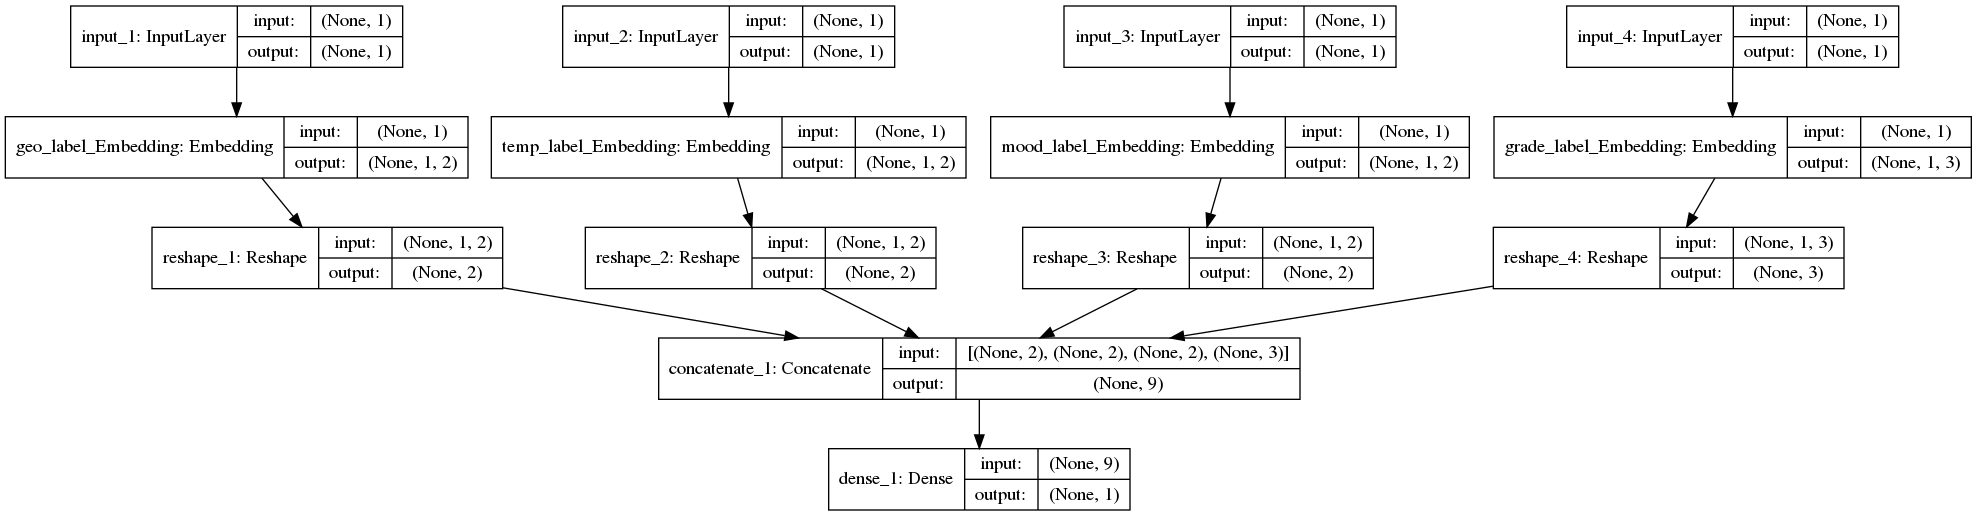

In [17]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [18]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
____________________________________________________________________________________________

This network accepts $4$ label encoded input variables. The size of the output from the embedding layer is min(50, number of categories/2). A single output neuron is connected to the embedding layer by $10$ weights ($9$ from the concatenated embedding layer and $1$ bias neuron). Because this is a single-class classification network, we use the sigmoid activation function and binary_crossentropy.

Create a list containing arrays for each categorical variable, create target labels and fit the model

In [19]:
encs = list()
for i in range(df_le.shape[1]):
    enc = df_le.iloc[:, i]
    encs.append(np.array(enc))

In [20]:
labels = np.array([0,1,0,0,1,0,0,1,0,1])
model.fit(encs, labels, epochs=100, verbose=0)

Map each entity embedding value from neural network back to original categorical level of each categorical variable.

In [21]:
emb_df = df_le.copy()

for col in df_le.columns:
    weight_embed = col + '_Embedding'
    weight_df = pd.DataFrame(model.get_layer(weight_embed).get_weights()[0]).reset_index()
    for i in weight_df.columns:
        if i != 'index':
            sub_dict = dict(zip(weight_df['index'],weight_df[i]))
            emb_df[weight_embed] = emb_df[col].map(sub_dict).values
            
emb_df

,geo_label,temp_label,mood_label,grade_label,geo_label_Embedding,temp_label_Embedding,mood_label_Embedding,grade_label_Embedding
0,1,1,1,0,-0.122848,-0.117263,0.072982,0.115638
1,1,0,0,0,-0.122848,0.124928,0.149857,0.115638
2,2,3,2,2,-0.100467,-0.102622,-0.171453,0.136620
3,1,0,0,2,-0.122848,0.124928,0.149857,0.136620
4,0,1,1,2,0.178768,-0.117263,0.072982,0.136620
5,0,1,1,4,0.178768,-0.117263,0.072982,0.072289
6,0,1,1,1,0.178768,-0.117263,0.072982,0.121664
7,2,3,2,3,-0.100467,-0.102622,-0.171453,-0.109959
8,2,3,0,0,-0.100467,-0.102622,0.149857,0.115638
9,0,2,2,3,0.178768,0.078433,-0.171453,-0.109959


We can see the learned embeddings for each categorical variable